In [60]:
from obspy.core import UTCDateTime
import pandas as pd
import numpy as np
omnidir = './'
colnames = ['Date_Orig', 'K_F', 'K_p']
converters = {'Date_Orig':UTCDateTime}
kindexdf=pd.read_csv(omnidir+'kindex.csv',delimiter=',',skiprows=0,names=colnames, converters=converters)

In [61]:
#date=UTCDateTime(np.array(kindexdf['Date_Orig'].values))
#date = np.zeros(kindexdf.shape[0])
#timeofday = np.zeros(kindexdf.shape[0])
for i in range(kindexdf.shape[0]):
    date[i] = kindexdf['Date_Orig'].values[i].timestamp
    #t = UTCDateTime(date[i])
    #daytime = t.timestamp - (UTCDateTime(t.year, t.month, t.day)).timestamp
    #timeofday[i] = daytime
kindexdf.insert(0, 'Date', pd.Series(np.array(date)))
#kindexdf.insert(1, 'TimeOfDay', pd.Series(np.array(timeofday)))
kindexdf.drop('Date_Orig', axis=1, inplace=True)

In [62]:
#Load combined USGS and OMNI data
#execfile('merge_geomag_omni_dataframes.py')
if ('df' in locals()) == False:
    exec(open("./merge_geomag_omni_dataframes.py").read())
print("Loaded geomag and OMNI data")

Loaded geomag and OMNI data


In [ ]:
newdf = df.merge(kindexdf, left_on='Date', right_on='Date', how='outer')
for i in range(newdf['K_F'].shape[0]):
    if ~np.isnan(newdf['K_F'].values[i]):
        last_value = newdf['K_F'].values[i]
    else:
        newdf['K_F'].values[i] = last_value
for i in range(newdf['K_p'].shape[0]):
    if ~np.isnan(newdf['K_p'].values[i]):
        last_value = newdf['K_p'].values[i]
    else:
        newdf['K_p'].values[i] = last_value

lookforward = 180 #In integer minutes
future_K_p = newdf['K_p'].values
future_K_p = np.roll(future_K_p, -lookforward)
newdf.insert(newdf.shape[1], "K_p{0:02d}h".format(int(lookforward/60)), pd.Series(np.array(future_K_p)))

lookforward = 180*2 #In integer minutes
future_K_p = newdf['K_p'].values
future_K_p = np.roll(future_K_p, -lookforward)
newdf.insert(newdf.shape[1], "K_p{0:02d}h".format(int(lookforward/60)), pd.Series(np.array(future_K_p)))

lookforward = 180*3 #In integer minutes
future_K_p = newdf['K_p'].values
future_K_p = np.roll(future_K_p, -lookforward)
newdf.insert(newdf.shape[1], "K_p{0:02d}h".format(int(lookforward/60)), pd.Series(np.array(future_K_p)))

lookforward = 180*4 #In integer minutes
future_K_p = newdf['K_p'].values
future_K_p = np.roll(future_K_p, -lookforward)
newdf.insert(newdf.shape[1], "K_p{0:02d}h".format(int(lookforward/60)), pd.Series(np.array(future_K_p)))

#Add column for time of day
timeofday = np.zeros(newdf.shape[0])
for i in range(kindexdf.shape[0]):
    t = UTCDateTime(newdf['Date'].values[i])
    timeofday[i] = t.timestamp - (UTCDateTime(t.year, t.month, t.day)).timestamp
    
newdf.insert(newdf.shape[1], 'TimeOfDay', pd.Series(np.array(timeofday)))

In [73]:
newdf.dropna(how='any',axis=0,inplace=True)
newdf.values.max()
#newdf.dropna(subset=['Year'])
newdf

,Date,Year,Day,Hour,Minute,ID IMF Spacecraft,IF SW Plasma Spacecraft,#points in IMF avg,#points in plasma avgs,Percent interp,...,TUC_Y,TUC_Z,TUC_F,K_F,K_p,K_p03h,K_p06h,K_p09h,K_p12h,TimeOfDay
3,1.451607e+09,2016.0,1.0,0.0,3.0,71.0,71.0,4.0,2.0,0.0,...,5089.490,40363.803,47372.014,5.0,6.0,5.0,5.0,3.0,2.0,180.0
4,1.451607e+09,2016.0,1.0,0.0,4.0,71.0,71.0,12.0,3.0,0.0,...,5091.069,40363.934,47372.639,5.0,6.0,5.0,5.0,3.0,2.0,240.0
5,1.451607e+09,2016.0,1.0,0.0,5.0,71.0,71.0,7.0,3.0,0.0,...,5092.736,40364.065,47373.276,5.0,6.0,5.0,5.0,3.0,2.0,300.0
6,1.451607e+09,2016.0,1.0,0.0,6.0,71.0,71.0,3.0,1.0,0.0,...,5093.889,40364.159,47374.063,5.0,6.0,5.0,5.0,3.0,2.0,360.0
7,1.451607e+09,2016.0,1.0,0.0,7.0,71.0,71.0,8.0,2.0,0.0,...,5095.041,40364.305,47374.978,5.0,6.0,5.0,5.0,3.0,2.0,420.0
8,1.451607e+09,2016.0,1.0,0.0,8.0,71.0,71.0,3.0,2.0,0.0,...,5095.211,40364.329,47375.519,5.0,6.0,5.0,5.0,3.0,2.0,480.0
9,1.451607e+09,2016.0,1.0,0.0,9.0,71.0,71.0,1.0,1.0,0.0,...,5096.365,40364.395,47375.700,5.0,6.0,5.0,5.0,3.0,2.0,540.0
10,1.451607e+09,2016.0,1.0,0.0,10.0,71.0,71.0,1.0,1.0,0.0,...,5096.788,40364.411,47375.820,5.0,6.0,5.0,5.0,3.0,2.0,600.0
11,1.451607e+09,2016.0,1.0,0.0,11.0,71.0,71.0,4.0,1.0,0.0,...,5096.654,40364.432,47376.123,5.0,6.0,5.0,5.0,3.0,2.0,660.0
12,1.451607e+09,2016.0,1.0,0.0,12.0,71.0,71.0,12.0,4.0,0.0,...,5096.612,40364.449,47376.237,5.0,6.0,5.0,5.0,3.0,2.0,720.0


7.0 0.0


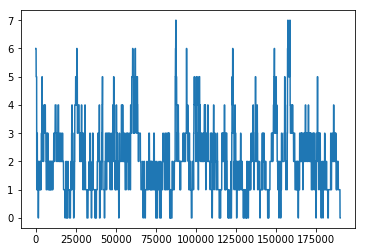

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(newdf['K_p'].values[0:190000])
print(newdf['K_p'].values.max(),newdf['K_p'].values.min())

In [158]:
times = newdf.loc[:,'Date']
input = newdf.loc[:,['TimeOfDay','Field mag avg, nT', 'Bx, nT (GSE, GSM)', 'By, nT (GSE,GSM)',
                     'Bz, nT (GSE)', 'By, nT (GSM)', 'Bz, nT (GSM)', 
                     #'RMS SD B scalar, nT',
                     #'RMS SD field vector, nT', 
                     'Flow speed, km/s', 
                     'Vx, km/s, GSE',
                     'Vy, km/s, GSE', 
                     'Vz, km/s, GSE', 
                     'Proton density, n/cc',
                     #'Temperture, K', 'Flow pressure, nPa', 
                     'Electric Field, mV/m',
                     'Plasma beta', 'Alfven mach number', 
                     'BOU_X', 'BOU_Y', 'BOU_Z', #'BOU_F',
                     'BRW_X', 'BRW_Y', 'BRW_Z', #'BRW_F',
                     'BSL_X', 'BSL_Y', 'BSL_Z', #'BSL_F', 
                     'CMO_X', 'CMO_Y', 'CMO_Z', #'CMO_F',
                     'DED_X', 'DED_Y', 'DED_Z', #'DED_F',
                     'FRD_X', 'FRD_Y', 'FRD_Z', #'FRD_F',
                     'FRN_X', 'FRN_Y', 'FRN_Z', #'FRN_F',
                     'GUA_X', 'GUA_Y', 'GUA_Z', #'GUA_F',
                     'HON_X', 'HON_Y', 'HON_Z', #'HON_F',
                     'NEW_X', 'NEW_Y', 'NEW_Z', #'NEW_F',
                     'SHU_X', 'SHU_Y', 'SHU_Z', #'SHU_F',
                     'SIT_X', 'SIT_Y', 'SIT_Z', #'SIT_F',
                     'SJG_X', 'SJG_Y', 'SJG_Z', #'SJG_F',
                     'TUC_X', 'TUC_Y', 'TUC_Z']] #, 'TUC_F']] 

lookforward = 4*180
output = newdf.loc[:,['K_p{0:02d}h'.format(int(lookforward/60))]]

ind = int(0.7*input.shape[0])
X_train, X_test = input.values[0:ind-lookforward,:], input.values[ind:-lookforward,:]
y_train, y_test = output.values[0:ind-lookforward,:], output.values[ind:-lookforward,:]
times_train, times_test = times.values[0:ind-lookforward], times.values[ind:-lookforward]

#Flatten into 1d array and scale
def kp_scale(y):
    return np.exp(y/9.0)

def kp_unscale(y):
    return np.log(y+1e-9)*9.0

y_test = kp_scale(y_test.ravel())
y_train = kp_scale(y_train.ravel())

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(283428, 57) (121058, 57)
(283428,) (121058,)


In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import losses

def logcosh(y_true, y_pred):
    import six
    from keras import backend as K
    def cosh(x):
        return (K.exp(x) + K.exp(-x)) / 2
    return K.mean(K.log(cosh(y_pred - y_true)), axis=-1)

models = []
modelnames = []

models.append(DummyRegressor(strategy='mean'))
modelnames.append('DummyRegressorMean')

models.append(DummyRegressor(strategy='median'))
modelnames.append('DummyRegressorMedian')

# create model
model = Sequential()
model.add(Dense(24, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12, init='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, init='uniform', activation='relu'))
# Compile model
model.compile(loss=logcosh, optimizer='sgd', metrics=['mean_squared_error'])
# Fit the model
#model.fit(X, Y, nb_epoch=150, batch_size=10,  verbose=2)

models.append(model)
modelnames.append('NN')

# List of models to fit
#models.append(LinearRegression())
#modelnames.append('LinearRegression')

#models.append(Lasso())
#modelnames.append('Lasso')

#models.append(LassoCV())
#modelnames.append('LassoCV')

#models.append(SGDRegressor()) <- returns 1e37 for mse
#modelnames.append('SGDRegressor')

#models.append(GaussianProcessRegressor())
#modelnames.append('GaussianProcessRegressor')

models.append(GradientBoostingRegressor(n_estimators=100))
modelnames.append('GradientBoostingRegressor100')

models.append(GradientBoostingRegressor(n_estimators=200))
modelnames.append('GradientBoostingRegressor200')

models.append(GradientBoostingRegressor(n_estimators=300))
modelnames.append('GradientBoostingRegressor300')

models.append(AdaBoostRegressor())
modelnames.append('AdaBoostRegressor')

models.append(BaggingRegressor())
modelnames.append('BaggingRegressor')

models.append(ExtraTreesRegressor())
modelnames.append('ExtraTreesRegressor')

models.append(RandomForestRegressor())
modelnames.append('RandomForestRegressor')

#models.append(SVR())
#modelnames.append('SVR')


/home/mcheung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_dim=57, activation="relu", kernel_initializer="uniform")`
/home/mcheung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`
/home/mcheung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
/home/mcheung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


In [ ]:
from matplotlib.colors import LogNorm

rms = np.zeros(len(models))
y_preds = np.zeros([len(models),len(y_test)])
for m in range(len(models)):
    model = models[m]
    if modelnames[m] == 'NN':
        model.fit(X_train, y_train, epochs=10, batch_size=1024,  verbose=2)
    else:
        model.fit(X_train, y_train)

    models[m] = model
    y_pred = (model.predict(X_test)).ravel()
    y_preds[m,:] = y_pred.ravel()
    rms[m] = np.mean((y_pred-y_test)*(y_pred-y_test))
    print(modelnames[m], rms[m])
    
    plt.hist2d(kp_unscale(y_test), kp_unscale(y_preds[m,:]), range=[[0,9],[0,9]], bins=[10,10], norm=LogNorm())
    plt.title(modelnames[m])
    plt.savefig('kp_regress_model_{0}.jpg'.format(modelnames[m]))

DummyRegressorMean 0.0465883574701
DummyRegressorMedian 0.0484765450942
Epoch 1/10
1s - loss: 0.6735 - mean_squared_error: 1.8064
Epoch 2/10
0s - loss: 0.6489 - mean_squared_error: 1.6246
Epoch 3/10
0s - loss: 0.6035 - mean_squared_error: 1.5025
Epoch 4/10
0s - loss: 0.5204 - mean_squared_error: 1.2939
Epoch 5/10
0s - loss: 0.4520 - mean_squared_error: 1.1289
Epoch 6/10
0s - loss: 0.4426 - mean_squared_error: 1.1085
Epoch 7/10
0s - loss: 0.4415 - mean_squared_error: 1.1062
Epoch 8/10
0s - loss: 0.4426 - mean_squared_error: 1.1089
Epoch 9/10
0s - loss: 0.4413 - mean_squared_error: 1.1055
Epoch 10/10
0s - loss: 0.4412 - mean_squared_error: 1.1053
NN 1.72822483677


/home/mcheung/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:932: RuntimeWarning: divide by zero encountered in log
  resdat -= np.log(vmin)
/home/mcheung/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: divide by zero encountered in log
  resdat /= (np.log(vmax) - np.log(vmin))
/home/mcheung/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:933: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (np.log(vmax) - np.log(vmin))


GradientBoostingRegressor100 0.0628208833226
GradientBoostingRegressor200 0.138606099707


In [ ]:
for m in range(len(models)):
    plt.hist2d(kp_unscale(y_test), kp_unscale(y_preds[m,:]))#,norm=LogNorm())
    plt.xlim(0,9)
    plt.ylim(0,9)
    plt.title(modelnames[m])
    plt.colorbar()
    plt.show()

In [ ]:
dir = "./Kp{0:02d}hForecast".format(int(lookforward/60))

import os
try:
    os.stat(dir)
except:
    os.mkdir(dir)
    
plt.figure(figsize=(20,10))
for m in range(len(models)):
    plt.plot(kp_unscale(y_preds[m,:]),'.',label=modelnames[m])

plt.plot(kp_unscale(y_test),label='Ground Truth K_p', linewidth=2, color='black')
plt.ylim(0,9)
plt.xlim(27000,45000)
plt.legend()
plt.xlabel(UTCDateTime(times_test[27000]))
plt.ylabel('Kp index',fontsize=12)
plt.savefig("{0}/Kp{1:02d}hForecast.jpg".format(dir,int(lookforward/60)))

In [ ]:
for m in range(len(models)):
    model = models[m]
    try:
        s = np.argsort(model.feature_importances_)
        plt.figure(figsize=(12,20))
        plt.barh(np.arange(len(input.columns)), model.feature_importances_[s],tick_label=input.columns[s])
        plt.xlabel('Feature Importance')
        plt.title('{0} for {1:02d}h forecast'.format(model,int(lookforward/60)))
        plt.savefig("{0}/Kp{1:02d}hForecast_{2}_Importance.jpg".format(dir, int(lookforward/60), modelnames[m]))
    except:
        pass